# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [290]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [292]:
data = pd.read_csv("demo01.csv")
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [294]:

# Separando a variável resposta (y) e as variáveis explicativas (X)
# Supondo que a variável resposta seja chamada 'target'
y = data['tipo_renda']
X = data.drop(columns=['tipo_renda'])

In [296]:

# Removendo variáveis string (já gerando dummies caso necessário)
X = pd.get_dummies(X, drop_first=True)

In [298]:
# Separando os dados em 70% para treino e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [300]:
# Armazenando as variáveis em objetos separados
# Para o treino
dados_treino_variaveis = X_train
dados_treino_resposta = y_train

In [302]:
# Para a validação
dados_validacao_variaveis = X_val
dados_validacao_resposta = y_val

In [304]:

# Exemplo de visualização das shapes (opcional)
print("Treino - Variáveis:", dados_treino_variaveis.shape)
print("Treino - Resposta:", dados_treino_resposta.shape)
print("Validação - Variáveis:", dados_validacao_variaveis.shape)
print("Validação - Resposta:", dados_validacao_resposta.shape)

Treino - Variáveis: (11655, 25)
Treino - Resposta: (11655,)
Validação - Variáveis: (4995, 25)
Validação - Resposta: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [311]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [313]:
clf_dt = clf_dt.fit(X,y)
clf_dt

DecisionTreeClassifier(random_state=100)

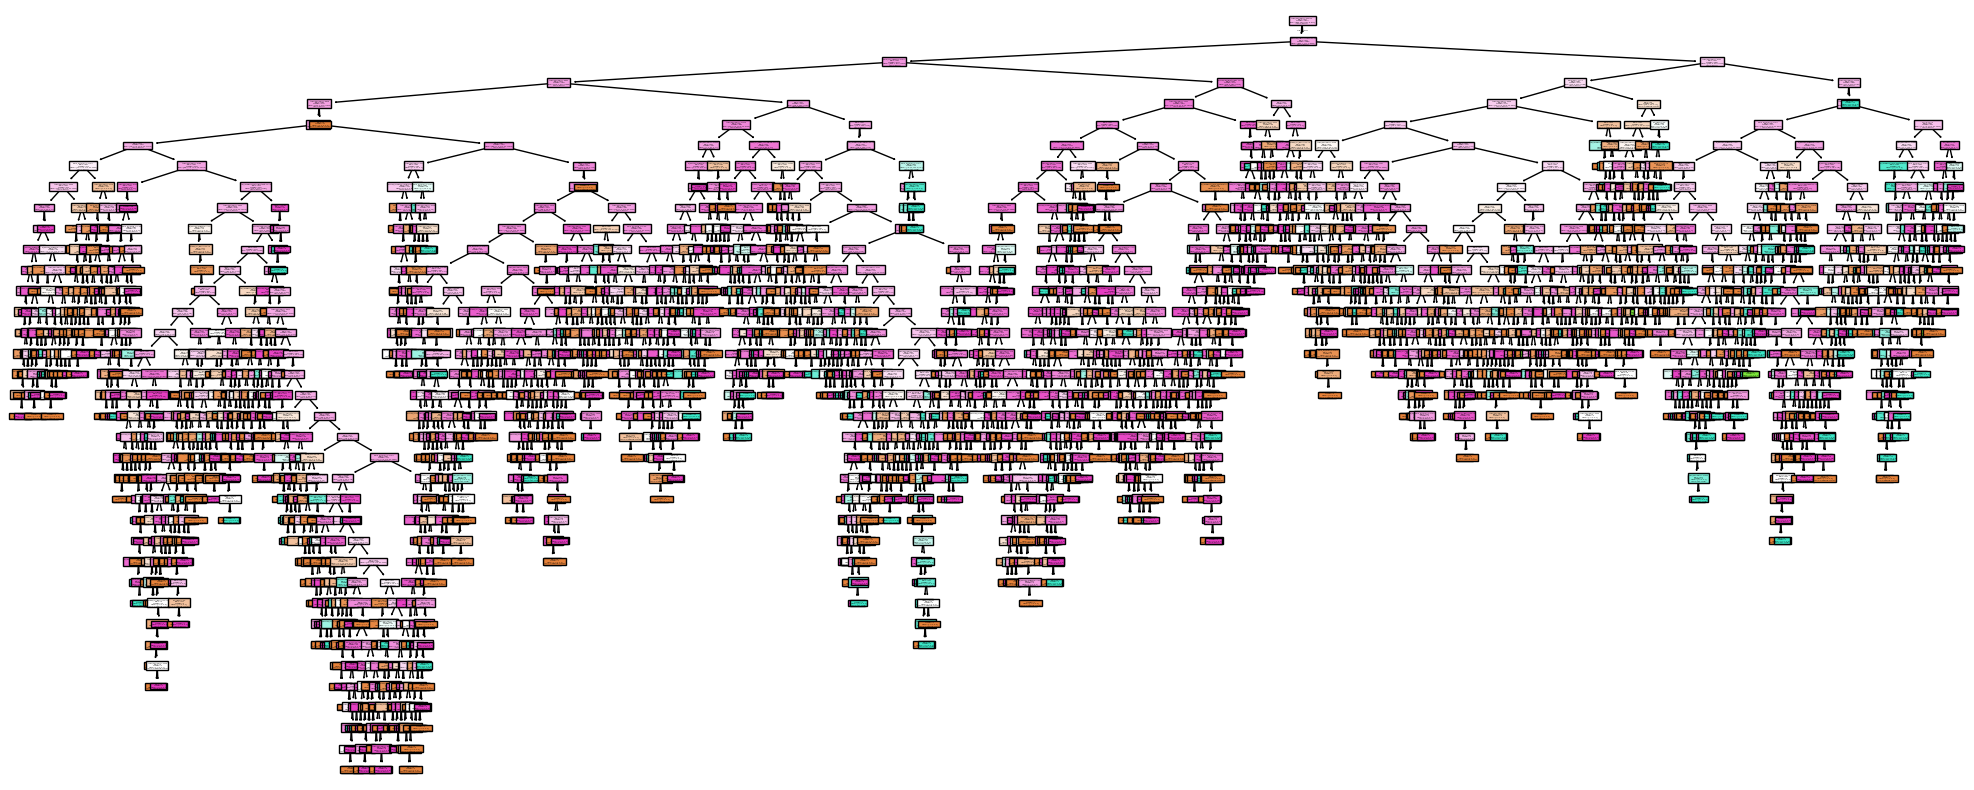

In [317]:
# Derive correct target class names dynamically
if hasattr(clf_dt, "classes_"):  # Check if it's a classifier
    class_names = clf_dt.classes_
else:
    class_names = None  # Omit class names for a regression task

plt.figure(figsize=(25, 10))
plot_tree(
    clf_dt,
    filled=True,
    feature_names=X.columns,
    class_names=class_names if class_names is not None else None
)
plt.show()

In [337]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

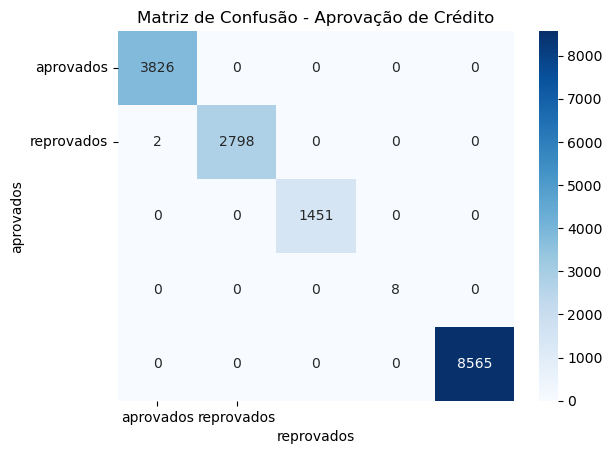

In [339]:
# Generate predictions and confusion matrix
y_pred = clf_dt.predict(X)
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('reprovados')
plt.ylabel('aprovados')
plt.title('Matriz de Confusão - Aprovação de Crédito')
plt.show()

In [343]:
y_train_pred = clf_dt.predict(dados_treino_variaveis)
train_accuracy = accuracy_score(dados_treino_resposta, y_train_pred)
print(f"Acurácia na base de treinamento: {train_accuracy:.2f}")

Acurácia na base de treinamento: 1.00


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [345]:
# Classificando a base de validação
y_val_pred = clf_dt.predict(dados_validacao_variaveis)

# Exibindo as previsões
print("Previsões na base de validação:", y_val_pred)

# Opcional: Avaliar a acurácia na base de validação
val_accuracy = accuracy_score(dados_validacao_resposta, y_val_pred)
print(f"Acurácia na base de validação: {val_accuracy:.2f}")


Previsões na base de validação: ['Commercial associate' 'Working' 'Commercial associate' ... 'Working'
 'Pensioner' 'Working']
Acurácia na base de validação: 1.00


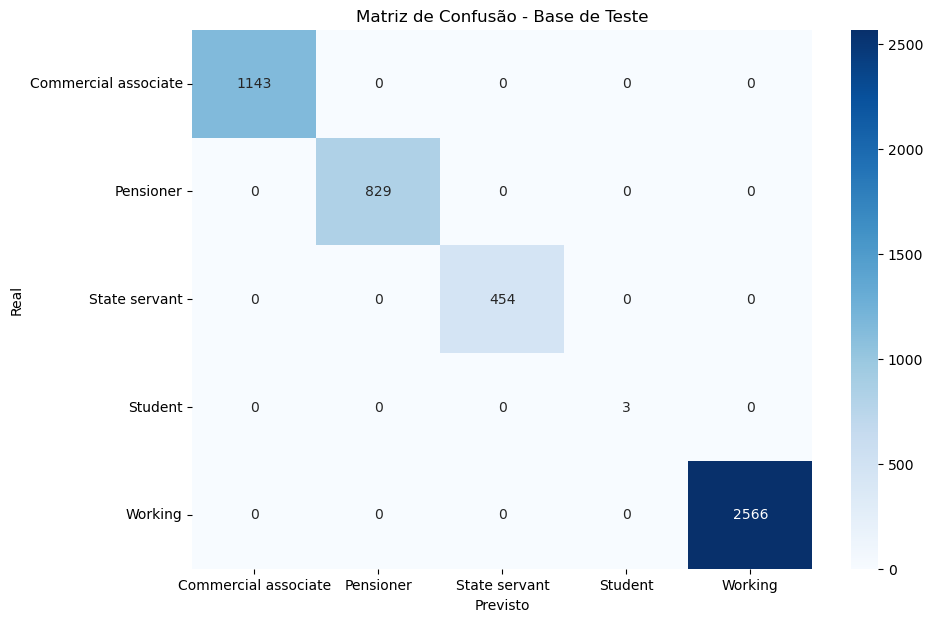

In [347]:
# Realizar as previsões para a base de validação (ou base de teste, se disponível)
y_test_pred = clf_dt.predict(dados_validacao_variaveis)

# Gerar matriz de confusão
cm_test = confusion_matrix(dados_validacao_resposta, y_test_pred)

# Criação das etiquetas (substitua com os nomes reais das classes, se disponível)
class_names = clf_dt.classes_  # Classes do modelo

# Visualização da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Configuração dos eixos e título
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

In [349]:
# Previsões para a base de teste
y_test_pred = clf_dt.predict(dados_validacao_variaveis)

# Acurácia na base de teste
test_accuracy = accuracy_score(dados_validacao_resposta, y_test_pred)
print(f"Acurácia na base de teste: {test_accuracy:.2f}")

# Acurácia já calculada na base de treinamento
y_train_pred = clf_dt.predict(dados_treino_variaveis)
train_accuracy = accuracy_score(dados_treino_resposta, y_train_pred)
print(f"Acurácia na base de treinamento: {train_accuracy:.2f}")

# Comparando os resultados
print(f"Diferença entre acurácia de treino e teste: {train_accuracy - test_accuracy:.2f}")

Acurácia na base de teste: 1.00
Acurácia na base de treinamento: 1.00
Diferença entre acurácia de treino e teste: -0.00


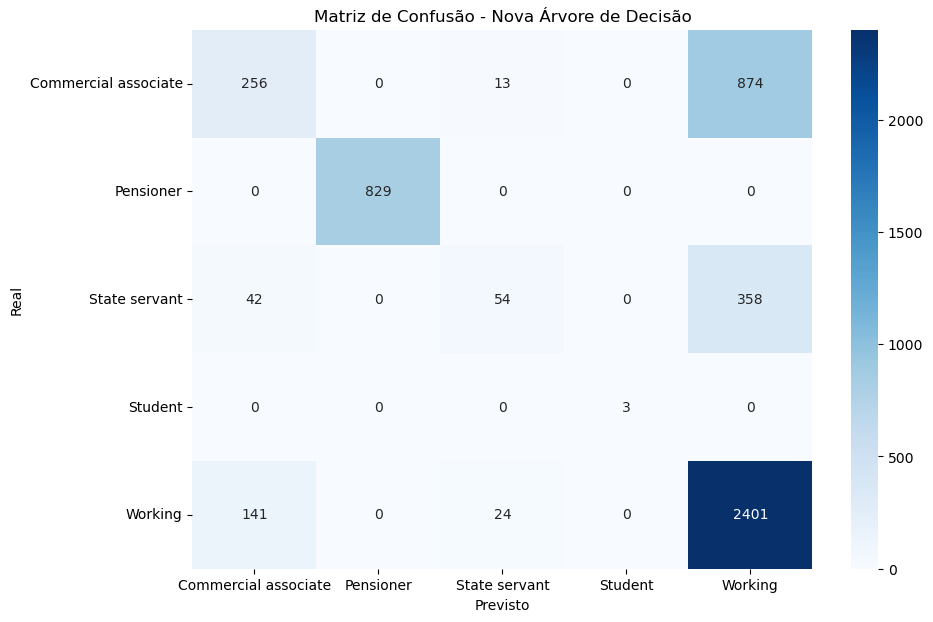

A distribuição das classes previstas: {'Commercial associate': 439, 'Pensioner': 829, 'State servant': 91, 'Student': 3, 'Working': 3633}
A proporção de proponentes classificados como 'maus': 0.00%


In [351]:
# Treinar o modelo com os parâmetros fornecidos
clf_dt_new = DecisionTreeClassifier(
    random_state=123,
    min_samples_leaf=5,
    max_depth=10
)
clf_dt_new = clf_dt_new.fit(dados_treino_variaveis, dados_treino_resposta)

# Fazer previsões para a base de validação
y_val_pred_new = clf_dt_new.predict(dados_validacao_variaveis)

# Avaliação: Matriz de confusão
cm_new = confusion_matrix(dados_validacao_resposta, y_val_pred_new)

# Visualização da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf_dt_new.classes_,
            yticklabels=clf_dt_new.classes_)

# Configuração de título e eixos
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Nova Árvore de Decisão')
plt.show()

# Analisar a distribuição das previsões
unique, counts = np.unique(y_val_pred_new, return_counts=True)
prediction_distribution = dict(zip(unique, counts))

# Classificação da proporção de 'maus' (pode variar baseado no valor exato)
total_predictions = len(y_val_pred_new)
proportion_maus = prediction_distribution.get('mau', 0) / total_predictions

# Exibir os resultados
print(f"A distribuição das classes previstas: {prediction_distribution}")
print(f"A proporção de proponentes classificados como 'maus': {proportion_maus:.2%}")

In [353]:
# Previsões para a base de treinamento
y_train_pred_new = clf_dt_new.predict(dados_treino_variaveis)

# Calcular a acurácia na base de treinamento
train_accuracy_new = accuracy_score(dados_treino_resposta, y_train_pred_new)

# Exibir a acurácia
print(f"Acurácia na base de treinamento: {train_accuracy_new:.2f}")

Acurácia na base de treinamento: 0.74
